<a href="https://colab.research.google.com/github/st4rmy/ML/blob/main/Zadanie3(3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


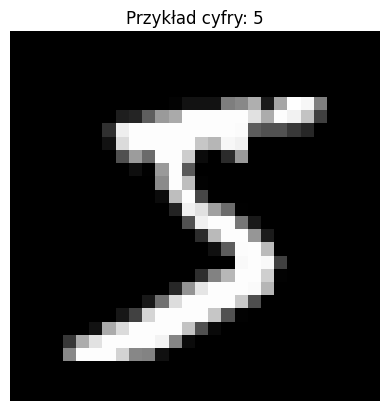

In [2]:

import tensorflow as tf
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()


plt.imshow(x_train[0], cmap='gray')
plt.title(f"Przykład cyfry: {y_train[0]}")
plt.axis('off')
plt.show()


In [27]:
import matplotlib.pyplot as plt
from torch.utils.data import Dataset
import torch
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
class SimpleCustomDataset(Dataset):
    def __init__(self, data, labels):
        if len(data) != len(labels):
            raise ValueError("Data and labels must have the same length")
        self.data = data
        self.labels = labels

    def __len__(self):

        return len(self.data)

    def __getitem__(self, idx):
        sample = self.data[idx]
        label = self.labels[idx]

        if not isinstance(sample, torch.Tensor):
            sample = torch.tensor(sample, dtype=torch.float32)
        if not isinstance(label, torch.Tensor):
            label = torch.tensor(label, dtype=torch.long)

        return sample, label


sample_data = x_train
sample_labels = y_train
custom_dataset = SimpleCustomDataset(sample_data, sample_labels)

img, label = custom_dataset[0]

print("Kształt:", img.shape)
print("Typ danych:", img.dtype)
print("Minimalna wartość:", img.min().item())
print("Maksymalna wartość:", img.max().item())
print("Etykieta:", label.item())



Kształt: torch.Size([28, 28])
Typ danych: torch.float32
Minimalna wartość: 0.0
Maksymalna wartość: 255.0
Etykieta: 5


# Wnioski z poprzednich zadań


1.   Dane potrzebne do zrobienia zadania należy dopasować w taki sposób, żeby pasowały one do modelu. W tym przypadku ważne jest, aby obrazy zostały spłaszczone, co umożliwi dopasowanie ich do sieci.
2.   Wybór metryki jest istotny w kontekście zadania, ponieważ każda z dostępnych rodzajów inaczej wykonuje pomiary.
3.   Wizualizacja wyników sprawia, że łatwiej można je zinterpretować.






In [5]:

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import itertools
import time
import os
import random

SEED = 42
torch.manual_seed(SEED)
np.random.seed(SEED)
random.seed(SEED)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

Dzielę zestaw danych na dane treningowe, testowe oraz walidacyjne

In [19]:

import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()


class SimpleNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x
input_dim = 784
hidden_dim = 128
output_dim = 10
model = SimpleNN(input_dim, hidden_dim, output_dim)

sample_input = torch.randn(64, input_dim)

output_tensor = model(sample_input)

print(f"Kształt wejściowego tensora: {sample_input.shape}")
print(f"Kształt wyjściowego tensora z sieci: {output_tensor.shape}")

train_loader = DataLoader(custom_dataset, batch_size=1, shuffle=False)

for batch_data, batch_labels in train_loader:
    batch_data = batch_data.view(batch_data.size(0), -1)
    print(f"Kształt batcha: {batch_data.shape}")
    print(f"Etykieta: {batch_labels.item()}")
    break

Kształt wejściowego tensora: torch.Size([64, 784])
Kształt wyjściowego tensora z sieci: torch.Size([64, 10])
Kształt batcha: torch.Size([1, 784])
Etykieta: 5


/tmp/ipython-input-3859599826.py:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tensor = torch.tensor(sample, dtype=torch.float32)
/tmp/ipython-input-3859599826.py:28: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sample = torch.tensor(sample, dtype=torch.float32).unsqueeze(0) / 255.0
/tmp/ipython-input-3859599826.py:29: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  label = torch.tensor(label, dtype=torch.long)


In [20]:
def train(model, loader, optimizer, criterion):
    model.train()
    total_loss, correct = 0, 0


    for x, y in loader:
        x = x.view(x.size(0), -1)
        x, y = x.to(device), y.to(device)
        optimizer.zero_grad()
        output = model(x)
        loss = criterion(output, y)
        loss.backward()
        optimizer.step()

        total_loss += loss.item() * x.size(0)
        correct += (output.argmax(1) == y).sum().item()

    return total_loss / len(loader.dataset), correct / len(loader.dataset)


In [21]:
def evaluate(model, loader, criterion):
    model.eval()
    total_loss, correct = 0, 0

    with torch.no_grad():
        for x, y in loader:
            x = x.view(x.size(0), -1).to(device)
            y = y.to(device)

            output = model(x)
            loss = criterion(output, y)

            total_loss += loss.item() * x.size(0)
            correct += (output.argmax(1) == y).sum().item()

    avg_loss = total_loss / len(loader.dataset)
    accuracy = correct / len(loader.dataset)
    return avg_loss, accuracy


In [22]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

data_root = "./data"
train_full = datasets.MNIST(root=data_root, train=True, download=True, transform=transform)
test_ds    = datasets.MNIST(root=data_root, train=False, download=True, transform=transform)

val_size = 5000
train_size = len(train_full) - val_size
train_ds, val_ds = random_split(train_full, [train_size, val_size], generator=torch.Generator().manual_seed(SEED))

BATCH_SIZE = 128
train_loader = DataLoader(train_ds, batch_size=BATCH_SIZE, shuffle=True, num_workers=2, pin_memory=True)
val_loader   = DataLoader(val_ds, batch_size=BATCH_SIZE, shuffle=False, num_workers=2, pin_memory=True)
test_loader  = DataLoader(test_ds, batch_size=BATCH_SIZE, shuffle=False, num_workers=2, pin_memory=True)

len(train_ds), len(val_ds), len(test_ds)

(55000, 5000, 10000)

In [23]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
for epoch in range(1, 11):
    train_loss, train_acc = train(model, train_loader, optimizer, criterion)
    val_loss, val_acc = evaluate(model, val_loader, criterion)
    print(f"Epoch {epoch}: Train acc={train_acc:.4f}, Val acc={val_acc:.4f}")


Epoch 1: Train acc=0.9115, Val acc=0.9432
Epoch 2: Train acc=0.9597, Val acc=0.9606
Epoch 3: Train acc=0.9717, Val acc=0.9668
Epoch 4: Train acc=0.9776, Val acc=0.9688
Epoch 5: Train acc=0.9822, Val acc=0.9718
Epoch 6: Train acc=0.9857, Val acc=0.9722
Epoch 7: Train acc=0.9884, Val acc=0.9758
Epoch 8: Train acc=0.9913, Val acc=0.9756
Epoch 9: Train acc=0.9929, Val acc=0.9742
Epoch 10: Train acc=0.9947, Val acc=0.9740


# Podstawowy model
Pzepuszczam dane przez niezmieniony model, żeby po dokonaniu zmian móc porównać wyniki. Co do wyboru metryki to zdecydowałam się na macierz korelaji ponieważ w ten sposób można zobaczyć w którym miejscu i ile razy pomylił się model.

In [20]:
import torch.nn as nn
class SimpleCNN(nn.Module):
    def __init__(self, num_classes=10):
        super().__init__()

        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool  = nn.MaxPool2d(2, 2)

        self.dropout = nn.Dropout(0.25)
        self.fc1  = nn.Linear(64 * 7 * 7, 128)
        self.fc2  = nn.Linear(128, num_classes)

    def forward(self, x):

        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.dropout(x)
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

model = SimpleCNN().to(device)


In [21]:
from torch.optim import Adam

EPOCHS = 5
lr = 1e-3
optimizer = Adam(model.parameters(), lr=lr)
criterion = nn.CrossEntropyLoss()

def run_epoch(loader, train: bool):

    epoch_loss, correct, total = 0.0, 0, 0
    if train:
        model.train()
    else:
        model.eval()
    for xb, yb in loader:
        xb, yb = xb.to(device, non_blocking=True), yb.to(device, non_blocking=True)
        if train:
            optimizer.zero_grad()
        with torch.set_grad_enabled(train):
            logits = model(xb)
            loss = criterion(logits, yb)
            if train:
                loss.backward()
                optimizer.step()
        epoch_loss += loss.item() * xb.size(0)
        preds = logits.argmax(1)
        correct += (preds == yb).sum().item()
        total += yb.size(0)
    return epoch_loss / total, correct / total

history = {"train_loss": [], "train_acc": [], "val_loss": [], "val_acc": []}
start = time.time()
for epoch in range(1, EPOCHS+1):
    tr_loss, tr_acc = run_epoch(train_loader, train=True)
    va_loss, va_acc = run_epoch(val_loader, train=False)
    history["train_loss"].append(tr_loss); history["train_acc"].append(tr_acc)
    history["val_loss"].append(va_loss);   history["val_acc"].append(va_acc)
    print(f"Ep {epoch:02d}/{EPOCHS} | train loss {tr_loss:.4f} acc {tr_acc:.4f} | val loss {va_loss:.4f} acc {va_acc:.4f}")
print(f"Czas treningu: {time.time()-start:.1f}s")



/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Ep 01/5 | train loss 0.2163 acc 0.9328 | val loss 0.0630 acc 0.9834
Ep 02/5 | train loss 0.0683 acc 0.9791 | val loss 0.0462 acc 0.9872
Ep 03/5 | train loss 0.0493 acc 0.9851 | val loss 0.0407 acc 0.9884
Ep 04/5 | train loss 0.0412 acc 0.9868 | val loss 0.0416 acc 0.9878
Ep 05/5 | train loss 0.0342 acc 0.9887 | val loss 0.0339 acc 0.9888
Czas treningu: 245.4s


Test accuracy: 0.9918


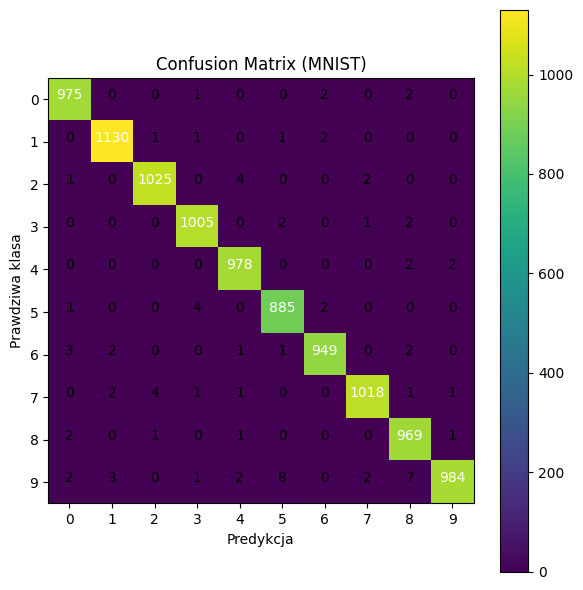

              precision    recall  f1-score   support

           0     0.9909    0.9949    0.9929       980
           1     0.9938    0.9956    0.9947      1135
           2     0.9942    0.9932    0.9937      1032
           3     0.9921    0.9950    0.9936      1010
           4     0.9909    0.9959    0.9934       982
           5     0.9866    0.9922    0.9894       892
           6     0.9937    0.9906    0.9922       958
           7     0.9951    0.9903    0.9927      1028
           8     0.9838    0.9949    0.9893       974
           9     0.9960    0.9752    0.9855      1009

    accuracy                         0.9918     10000
   macro avg     0.9917    0.9918    0.9917     10000
weighted avg     0.9918    0.9918    0.9918     10000



In [22]:
model.eval()
all_preds, all_targets = [], []
with torch.no_grad():
    for xb, yb in test_loader:
        xb = xb.to(device, non_blocking=True)
        logits = model(xb)
        preds = logits.argmax(1).cpu().numpy()
        all_preds.append(preds)
        all_targets.append(yb.numpy())

y_pred = np.concatenate(all_preds)
y_true = np.concatenate(all_targets)

test_acc = (y_pred == y_true).mean()
print(f"Test accuracy: {test_acc:.4f}")



cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6,6))
plt.imshow(cm, interpolation='nearest')
plt.title("Confusion Matrix (MNIST)")
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, tick_marks)
plt.yticks(tick_marks, tick_marks)

thresh = cm.max() / 2.0
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.ylabel('Prawdziwa klasa')
plt.xlabel('Predykcja')
plt.tight_layout()
plt.show()

print(classification_report(y_true, y_pred, digits=4))



Na wyświetlonej powyżej wizualizacji można zobaczyć, że model działa w dużym stopniu poprawnie, choć nie jest on w stanie uniknąć pojedynczych błędów. Warto wspomnieć, że poradził sobie lepiej niż prosta sieć.

# Obserwacje dotyczące zmiany dropout-u

In [23]:
import torch.nn as nn
class SimpleCNN(nn.Module):
    def __init__(self, num_classes=10):
        super().__init__()

        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool  = nn.MaxPool2d(2, 2)

        self.dropout = nn.Dropout(0.30)
        self.fc1  = nn.Linear(64 * 7 * 7, 128)
        self.fc2  = nn.Linear(128, num_classes)

    def forward(self, x):

        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.dropout(x)
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

model = SimpleCNN().to(device)

Na początek spróbuję zwiększyć dropout

In [24]:
from torch.optim import Adam

EPOCHS = 5
lr = 1e-3
optimizer = Adam(model.parameters(), lr=lr)
criterion = nn.CrossEntropyLoss()

def run_epoch(loader, train: bool):

    epoch_loss, correct, total = 0.0, 0, 0
    if train:
        model.train()
    else:
        model.eval()
    for xb, yb in loader:
        xb, yb = xb.to(device, non_blocking=True), yb.to(device, non_blocking=True)
        if train:
            optimizer.zero_grad()
        with torch.set_grad_enabled(train):
            logits = model(xb)
            loss = criterion(logits, yb)
            if train:
                loss.backward()
                optimizer.step()
        epoch_loss += loss.item() * xb.size(0)
        preds = logits.argmax(1)
        correct += (preds == yb).sum().item()
        total += yb.size(0)
    return epoch_loss / total, correct / total

history = {"train_loss": [], "train_acc": [], "val_loss": [], "val_acc": []}
start = time.time()
for epoch in range(1, EPOCHS+1):
    tr_loss, tr_acc = run_epoch(train_loader, train=True)
    va_loss, va_acc = run_epoch(val_loader, train=False)
    history["train_loss"].append(tr_loss); history["train_acc"].append(tr_acc)
    history["val_loss"].append(va_loss);   history["val_acc"].append(va_acc)
    print(f"Ep {epoch:02d}/{EPOCHS} | train loss {tr_loss:.4f} acc {tr_acc:.4f} | val loss {va_loss:.4f} acc {va_acc:.4f}")
print(f"Czas treningu: {time.time()-start:.1f}s")

/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Ep 01/5 | train loss 0.2257 acc 0.9313 | val loss 0.0643 acc 0.9826
Ep 02/5 | train loss 0.0744 acc 0.9773 | val loss 0.0444 acc 0.9874
Ep 03/5 | train loss 0.0557 acc 0.9828 | val loss 0.0412 acc 0.9886
Ep 04/5 | train loss 0.0450 acc 0.9860 | val loss 0.0342 acc 0.9902
Ep 05/5 | train loss 0.0390 acc 0.9875 | val loss 0.0327 acc 0.9898
Czas treningu: 263.3s


Test accuracy: 0.9921


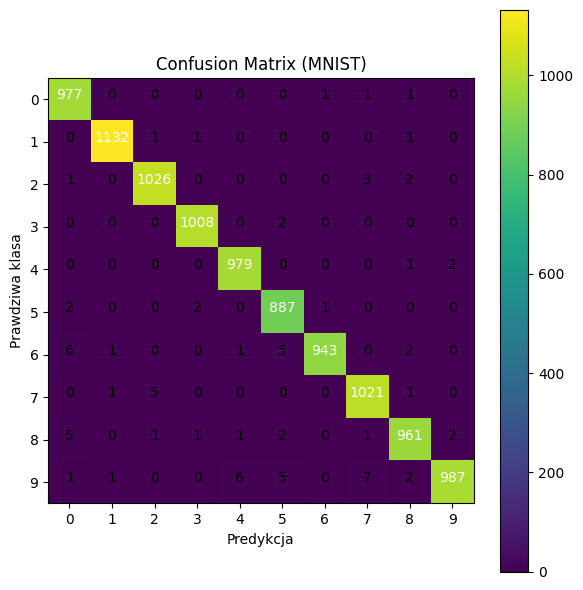

              precision    recall  f1-score   support

           0     0.9849    0.9969    0.9909       980
           1     0.9974    0.9974    0.9974      1135
           2     0.9932    0.9942    0.9937      1032
           3     0.9960    0.9980    0.9970      1010
           4     0.9919    0.9969    0.9944       982
           5     0.9845    0.9944    0.9894       892
           6     0.9979    0.9843    0.9911       958
           7     0.9884    0.9932    0.9908      1028
           8     0.9897    0.9867    0.9882       974
           9     0.9960    0.9782    0.9870      1009

    accuracy                         0.9921     10000
   macro avg     0.9920    0.9920    0.9920     10000
weighted avg     0.9921    0.9921    0.9921     10000



In [25]:
model.eval()
all_preds, all_targets = [], []
with torch.no_grad():
    for xb, yb in test_loader:
        xb = xb.to(device, non_blocking=True)
        logits = model(xb)
        preds = logits.argmax(1).cpu().numpy()
        all_preds.append(preds)
        all_targets.append(yb.numpy())

y_pred = np.concatenate(all_preds)
y_true = np.concatenate(all_targets)

test_acc = (y_pred == y_true).mean()
print(f"Test accuracy: {test_acc:.4f}")



cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6,6))
plt.imshow(cm, interpolation='nearest')
plt.title("Confusion Matrix (MNIST)")
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, tick_marks)
plt.yticks(tick_marks, tick_marks)

thresh = cm.max() / 2.0
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.ylabel('Prawdziwa klasa')
plt.xlabel('Predykcja')
plt.tight_layout()
plt.show()

print(classification_report(y_true, y_pred, digits=4))

Zwiększenie dropoutu spowodowało polepszenie rozpoznawalności modelu, więc tym razem spróbuję go zmniejszyć

In [26]:
import torch.nn as nn
class SimpleCNN(nn.Module):
    def __init__(self, num_classes=10):
        super().__init__()

        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool  = nn.MaxPool2d(2, 2)

        self.dropout = nn.Dropout(0.20)
        self.fc1  = nn.Linear(64 * 7 * 7, 128)
        self.fc2  = nn.Linear(128, num_classes)

    def forward(self, x):

        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.dropout(x)
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

model = SimpleCNN().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [27]:
def run_epoch(loader, train: bool):

    epoch_loss, correct, total = 0.0, 0, 0
    if train:
        model.train()
    else:
        model.eval()
    for xb, yb in loader:
        xb, yb = xb.to(device, non_blocking=True), yb.to(device, non_blocking=True)
        if train:
            optimizer.zero_grad()
        with torch.set_grad_enabled(train):
            logits = model(xb)
            loss = criterion(logits, yb)
            if train:
                loss.backward()
                optimizer.step()
        epoch_loss += loss.item() * xb.size(0)
        preds = logits.argmax(1)
        correct += (preds == yb).sum().item()
        total += yb.size(0)
    return epoch_loss / total, correct / total

history = {"train_loss": [], "train_acc": [], "val_loss": [], "val_acc": []}
start = time.time()
for epoch in range(1, EPOCHS+1):
    tr_loss, tr_acc = run_epoch(train_loader, train=True)
    va_loss, va_acc = run_epoch(val_loader, train=False)
    history["train_loss"].append(tr_loss); history["train_acc"].append(tr_acc)
    history["val_loss"].append(va_loss);   history["val_acc"].append(va_acc)
    print(f"Ep {epoch:02d}/{EPOCHS} | train loss {tr_loss:.4f} acc {tr_acc:.4f} | val loss {va_loss:.4f} acc {va_acc:.4f}")
print(f"Czas treningu: {time.time()-start:.1f}s")

/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Ep 01/5 | train loss 0.2007 acc 0.9388 | val loss 0.0612 acc 0.9824
Ep 02/5 | train loss 0.0632 acc 0.9802 | val loss 0.0511 acc 0.9842
Ep 03/5 | train loss 0.0471 acc 0.9850 | val loss 0.0406 acc 0.9870
Ep 04/5 | train loss 0.0369 acc 0.9888 | val loss 0.0341 acc 0.9898
Ep 05/5 | train loss 0.0300 acc 0.9906 | val loss 0.0335 acc 0.9916
Czas treningu: 244.5s


Test accuracy: 0.9908


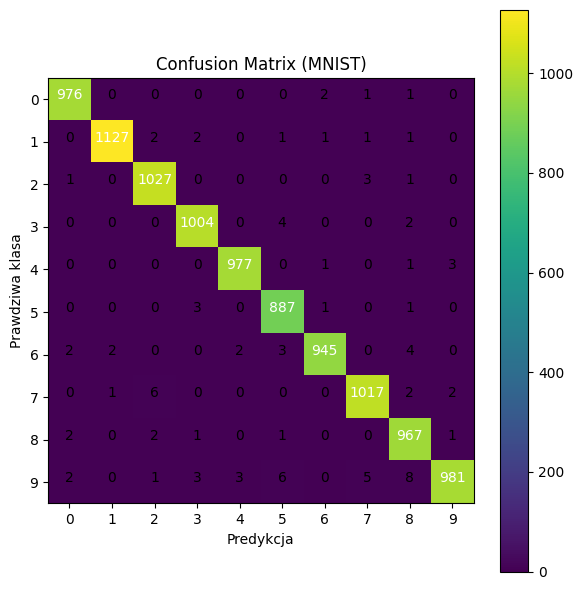

              precision    recall  f1-score   support

           0     0.9929    0.9959    0.9944       980
           1     0.9973    0.9930    0.9951      1135
           2     0.9894    0.9952    0.9923      1032
           3     0.9911    0.9941    0.9926      1010
           4     0.9949    0.9949    0.9949       982
           5     0.9834    0.9944    0.9889       892
           6     0.9947    0.9864    0.9906       958
           7     0.9903    0.9893    0.9898      1028
           8     0.9787    0.9928    0.9857       974
           9     0.9939    0.9722    0.9830      1009

    accuracy                         0.9908     10000
   macro avg     0.9907    0.9908    0.9907     10000
weighted avg     0.9908    0.9908    0.9908     10000



In [28]:
model.eval()
all_preds, all_targets = [], []
with torch.no_grad():
    for xb, yb in test_loader:
        xb = xb.to(device, non_blocking=True)
        logits = model(xb)
        preds = logits.argmax(1).cpu().numpy()
        all_preds.append(preds)
        all_targets.append(yb.numpy())

y_pred = np.concatenate(all_preds)
y_true = np.concatenate(all_targets)

test_acc = (y_pred == y_true).mean()
print(f"Test accuracy: {test_acc:.4f}")



cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6,6))
plt.imshow(cm, interpolation='nearest')
plt.title("Confusion Matrix (MNIST)")
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, tick_marks)
plt.yticks(tick_marks, tick_marks)

thresh = cm.max() / 2.0
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.ylabel('Prawdziwa klasa')
plt.xlabel('Predykcja')
plt.tight_layout()
plt.show()

print(classification_report(y_true, y_pred, digits=4))

Niestety ta modyfikacja modelu okazała się być gorszą możliwością niż podstawowy model, o czym świadczą powyższe wyniki.

# Zmodyfikowany model
Aby polepszyć przewidywania modelu próbowałam dodawać albo odejmować nowe warstwy konwolucyjne lub BatchNorm. Poniżej przedstawiam próby odnalezienia najefektywniejszej kombinacji warstw.

In [69]:
import torch.nn as nn
class SimpleCNN(nn.Module):
    def __init__(self, num_classes=10):
        super().__init__()

        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.BatchNorm1 = nn.BatchNorm2d(64)
        self.pool  = nn.MaxPool2d(2, 2)

        self.dropout = nn.Dropout(0.3)
        self.fc1  = nn.Linear(64 * 7 * 7, 128)
        self.fc2  = nn.Linear(128, num_classes)

    def forward(self, x):

        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.BatchNorm1(self.conv2(x))))
        x = self.dropout(x)
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

model = SimpleCNN().to(device)

Najpierw próbuję dodać warstwę BatchNorm i sprawdzam, jak zmieniły się wyniki

In [70]:
from torch.optim import Adam

EPOCHS = 5
lr = 1e-3
optimizer = Adam(model.parameters(), lr=lr)
criterion = nn.CrossEntropyLoss()

def run_epoch(loader, train: bool):

    epoch_loss, correct, total = 0.0, 0, 0
    if train:
        model.train()
    else:
        model.eval()
    for xb, yb in loader:
        xb, yb = xb.to(device, non_blocking=True), yb.to(device, non_blocking=True)
        if train:
            optimizer.zero_grad()
        with torch.set_grad_enabled(train):
            logits = model(xb)
            loss = criterion(logits, yb)
            if train:
                loss.backward()
                optimizer.step()
        epoch_loss += loss.item() * xb.size(0)
        preds = logits.argmax(1)
        correct += (preds == yb).sum().item()
        total += yb.size(0)
    return epoch_loss / total, correct / total

history = {"train_loss": [], "train_acc": [], "val_loss": [], "val_acc": []}
start = time.time()
for epoch in range(1, EPOCHS+1):
    tr_loss, tr_acc = run_epoch(train_loader, train=True)
    va_loss, va_acc = run_epoch(val_loader, train=False)
    history["train_loss"].append(tr_loss); history["train_acc"].append(tr_acc)
    history["val_loss"].append(va_loss);   history["val_acc"].append(va_acc)
    print(f"Ep {epoch:02d}/{EPOCHS} | train loss {tr_loss:.4f} acc {tr_acc:.4f} | val loss {va_loss:.4f} acc {va_acc:.4f}")
print(f"Czas treningu: {time.time()-start:.1f}s")

/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Ep 01/5 | train loss 0.1808 acc 0.9436 | val loss 0.0569 acc 0.9834
Ep 02/5 | train loss 0.0718 acc 0.9785 | val loss 0.0430 acc 0.9852
Ep 03/5 | train loss 0.0575 acc 0.9821 | val loss 0.0400 acc 0.9892
Ep 04/5 | train loss 0.0459 acc 0.9856 | val loss 0.0420 acc 0.9888
Ep 05/5 | train loss 0.0409 acc 0.9869 | val loss 0.0363 acc 0.9908
Czas treningu: 260.6s


Test accuracy: 0.9916


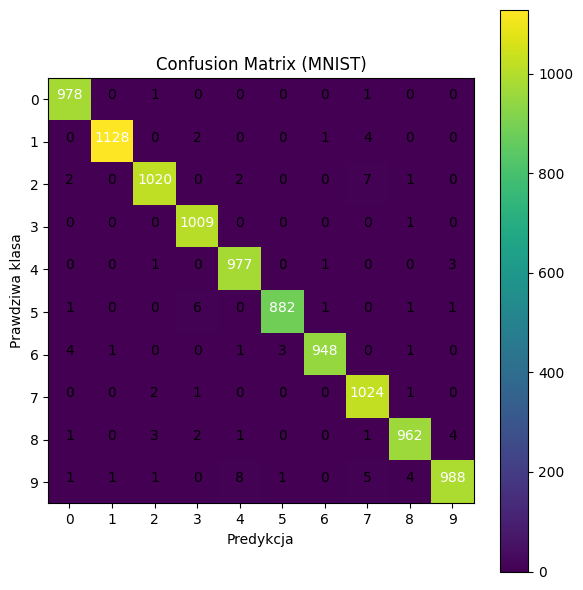

              precision    recall  f1-score   support

           0     0.9909    0.9980    0.9944       980
           1     0.9982    0.9938    0.9960      1135
           2     0.9922    0.9884    0.9903      1032
           3     0.9892    0.9990    0.9941      1010
           4     0.9879    0.9949    0.9914       982
           5     0.9955    0.9888    0.9921       892
           6     0.9968    0.9896    0.9932       958
           7     0.9827    0.9961    0.9894      1028
           8     0.9907    0.9877    0.9892       974
           9     0.9920    0.9792    0.9855      1009

    accuracy                         0.9916     10000
   macro avg     0.9916    0.9915    0.9916     10000
weighted avg     0.9916    0.9916    0.9916     10000



In [71]:
model.eval()
all_preds, all_targets = [], []
with torch.no_grad():
    for xb, yb in test_loader:
        xb = xb.to(device, non_blocking=True)
        logits = model(xb)
        preds = logits.argmax(1).cpu().numpy()
        all_preds.append(preds)
        all_targets.append(yb.numpy())

y_pred = np.concatenate(all_preds)
y_true = np.concatenate(all_targets)

test_acc = (y_pred == y_true).mean()
print(f"Test accuracy: {test_acc:.4f}")



cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6,6))
plt.imshow(cm, interpolation='nearest')
plt.title("Confusion Matrix (MNIST)")
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, tick_marks)
plt.yticks(tick_marks, tick_marks)

thresh = cm.max() / 2.0
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.ylabel('Prawdziwa klasa')
plt.xlabel('Predykcja')
plt.tight_layout()
plt.show()
print(classification_report(y_true, y_pred, digits=4))

Po porównaniu wyników z podstawowym modelem według metryk model sprawdził się tak trochę gorzej.

In [43]:
import torch.nn as nn
class SimpleCNN(nn.Module):
    def __init__(self, num_classes=10):
        super().__init__()

        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.pool  = nn.MaxPool2d(2, 2)

        self.dropout = nn.Dropout(0.3)
        with torch.no_grad():
            dummy_input = torch.randn(1, 1, 28, 28)
            x = self.pool(F.relu(self.conv1(dummy_input)))
            x = self.pool(F.relu(self.conv2(x)))
            x = self.pool(F.relu(self.conv3(x)))
            in_features = x.view(1, -1).size(1)
        self.fc1  = nn.Linear(in_features, 128)
        self.fc2  = nn.Linear(128, num_classes)

    def forward(self, x):


        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = self.dropout(x)

        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

model = SimpleCNN().to(device)

Dodaję trzecią warstwę konwolucyjną i sprawdzam jak sprawdzi się w pracy z danymi.

In [44]:
from torch.optim import Adam

EPOCHS = 5
lr = 1e-3
optimizer = Adam(model.parameters(), lr=lr)
criterion = nn.CrossEntropyLoss()

def run_epoch(loader, train: bool):

    epoch_loss, correct, total = 0.0, 0, 0
    if train:
        model.train()
    else:
        model.eval()
    for xb, yb in loader:
        xb, yb = xb.to(device, non_blocking=True), yb.to(device, non_blocking=True)
        if train:
            optimizer.zero_grad()
        with torch.set_grad_enabled(train):
            logits = model(xb)
            loss = criterion(logits, yb)
            if train:
                loss.backward()
                optimizer.step()
        epoch_loss += loss.item() * xb.size(0)
        preds = logits.argmax(1)
        correct += (preds == yb).sum().item()
        total += yb.size(0)
    return epoch_loss / total, correct / total

history = {"train_loss": [], "train_acc": [], "val_loss": [], "val_acc": []}
start = time.time()
for epoch in range(1, EPOCHS+1):
    tr_loss, tr_acc = run_epoch(train_loader, train=True)
    va_loss, va_acc = run_epoch(val_loader, train=False)
    history["train_loss"].append(tr_loss); history["train_acc"].append(tr_acc)
    history["val_loss"].append(va_loss);   history["val_acc"].append(va_acc)
    print(f"Ep {epoch:02d}/{EPOCHS} | train loss {tr_loss:.4f} acc {tr_acc:.4f} | val loss {va_loss:.4f} acc {va_acc:.4f}")
print(f"Czas treningu: {time.time()-start:.1f}s")

Ep 01/5 | train loss 0.2487 acc 0.9199 | val loss 0.0638 acc 0.9818
Ep 02/5 | train loss 0.0744 acc 0.9777 | val loss 0.0463 acc 0.9858
Ep 03/5 | train loss 0.0514 acc 0.9845 | val loss 0.0426 acc 0.9880
Ep 04/5 | train loss 0.0429 acc 0.9871 | val loss 0.0331 acc 0.9900
Ep 05/5 | train loss 0.0345 acc 0.9895 | val loss 0.0274 acc 0.9916
Czas treningu: 345.2s


Test accuracy: 0.9924


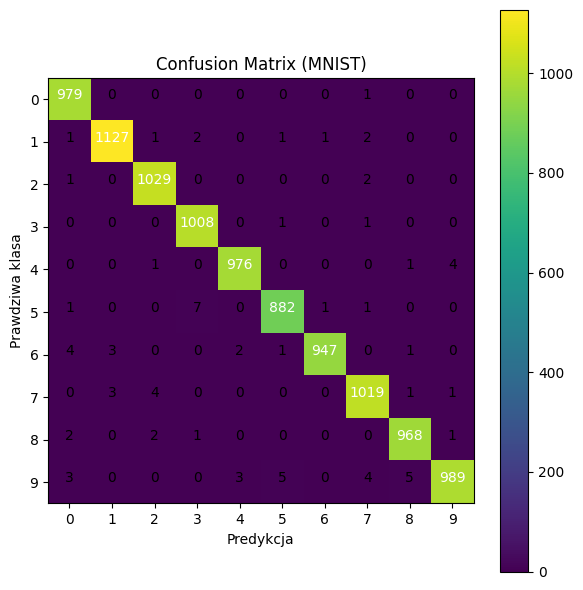

              precision    recall  f1-score   support

           0     0.9879    0.9990    0.9934       980
           1     0.9947    0.9930    0.9938      1135
           2     0.9923    0.9971    0.9947      1032
           3     0.9902    0.9980    0.9941      1010
           4     0.9949    0.9939    0.9944       982
           5     0.9910    0.9888    0.9899       892
           6     0.9979    0.9885    0.9932       958
           7     0.9893    0.9912    0.9903      1028
           8     0.9918    0.9938    0.9928       974
           9     0.9940    0.9802    0.9870      1009

    accuracy                         0.9924     10000
   macro avg     0.9924    0.9924    0.9924     10000
weighted avg     0.9924    0.9924    0.9924     10000



In [45]:
model.eval()
all_preds, all_targets = [], []
with torch.no_grad():
    for xb, yb in test_loader:
        xb = xb.to(device, non_blocking=True)
        logits = model(xb)
        preds = logits.argmax(1).cpu().numpy()
        all_preds.append(preds)
        all_targets.append(yb.numpy())

y_pred = np.concatenate(all_preds)
y_true = np.concatenate(all_targets)

test_acc = (y_pred == y_true).mean()
print(f"Test accuracy: {test_acc:.4f}")



cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6,6))
plt.imshow(cm, interpolation='nearest')
plt.title("Confusion Matrix (MNIST)")
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, tick_marks)
plt.yticks(tick_marks, tick_marks)

thresh = cm.max() / 2.0
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.ylabel('Prawdziwa klasa')
plt.xlabel('Predykcja')
plt.tight_layout()
plt.show()
print(classification_report(y_true, y_pred, digits=4))

Tu możemy zobaczyć, że zmodyfikowany model poradził sobie lepiej niż model podstawowy, jednak sprawdzam jeszcze czy istnieje lepsza kombinacja.

In [65]:
import torch.nn as nn
class SimpleCNN(nn.Module):
    def __init__(self, num_classes=10):
        super().__init__()

        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.BatchNorm1 = nn.BatchNorm2d(32)
        self.BatchNorm2 = nn.BatchNorm2d(64)
        self.BatchNorm3 = nn.BatchNorm2d(128)
        self.pool  = nn.MaxPool2d(2, 2)

        self.dropout = nn.Dropout(0.3)
        with torch.no_grad():
            dummy_input = torch.randn(1, 1, 28, 28)
            x = self.pool(F.relu(self.conv1(dummy_input)))
            x = self.pool(F.relu(self.conv2(x)))
            x = self.pool(F.relu(self.conv3(x)))
            in_features = x.view(1, -1).size(1)
        self.fc1  = nn.Linear(in_features, 128)
        self.fc2  = nn.Linear(128, num_classes)

    def forward(self, x):

        x = self.pool(F.relu(self.BatchNorm1(self.conv1(x))))
        x = self.pool(F.relu(self.BatchNorm2(self.conv2(x))))
        x = self.pool(F.relu(self.BatchNorm3(self.conv3(x))))
        x = self.dropout(x)
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

model = SimpleCNN().to(device)

Kolejna próba polega na dodaniu zarówno kolejnej warstwy konwolucyjnej jak i BatchNorm.

In [66]:
from torch.optim import Adam

EPOCHS = 5
lr = 1e-3
optimizer = Adam(model.parameters(), lr=lr)
criterion = nn.CrossEntropyLoss()

def run_epoch(loader, train: bool):

    epoch_loss, correct, total = 0.0, 0, 0
    if train:
        model.train()
    else:
        model.eval()
    for xb, yb in loader:
        xb, yb = xb.to(device, non_blocking=True), yb.to(device, non_blocking=True)
        if train:
            optimizer.zero_grad()
        with torch.set_grad_enabled(train):
            logits = model(xb)
            loss = criterion(logits, yb)
            if train:
                loss.backward()
                optimizer.step()
        epoch_loss += loss.item() * xb.size(0)
        preds = logits.argmax(1)
        correct += (preds == yb).sum().item()
        total += yb.size(0)
    return epoch_loss / total, correct / total

history = {"train_loss": [], "train_acc": [], "val_loss": [], "val_acc": []}
start = time.time()
for epoch in range(1, EPOCHS+1):
    tr_loss, tr_acc = run_epoch(train_loader, train=True)
    va_loss, va_acc = run_epoch(val_loader, train=False)
    history["train_loss"].append(tr_loss); history["train_acc"].append(tr_acc)
    history["val_loss"].append(va_loss);   history["val_acc"].append(va_acc)
    print(f"Ep {epoch:02d}/{EPOCHS} | train loss {tr_loss:.4f} acc {tr_acc:.4f} | val loss {va_loss:.4f} acc {va_acc:.4f}")
print(f"Czas treningu: {time.time()-start:.1f}s")

/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Ep 01/5 | train loss 0.1791 acc 0.9456 | val loss 0.0724 acc 0.9762
Ep 02/5 | train loss 0.0580 acc 0.9822 | val loss 0.0366 acc 0.9878
Ep 03/5 | train loss 0.0454 acc 0.9861 | val loss 0.0346 acc 0.9890
Ep 04/5 | train loss 0.0378 acc 0.9882 | val loss 0.0339 acc 0.9896
Ep 05/5 | train loss 0.0314 acc 0.9900 | val loss 0.0341 acc 0.9892
Czas treningu: 372.5s


Test accuracy: 0.9910


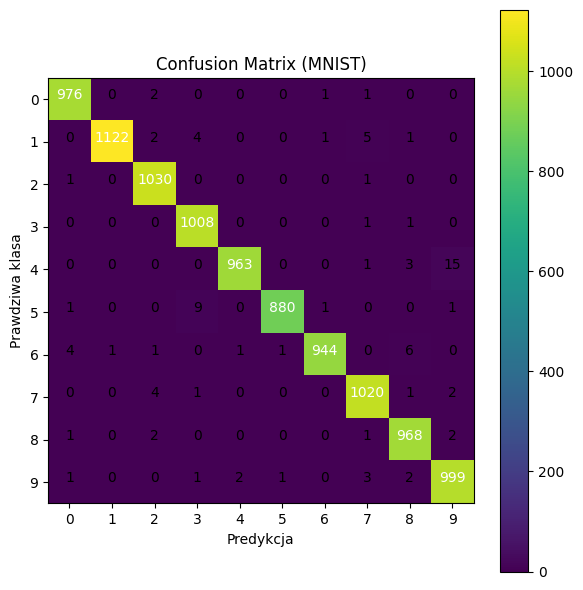

              precision    recall  f1-score   support

           0     0.9919    0.9959    0.9939       980
           1     0.9991    0.9885    0.9938      1135
           2     0.9894    0.9981    0.9937      1032
           3     0.9853    0.9980    0.9916      1010
           4     0.9969    0.9807    0.9887       982
           5     0.9977    0.9865    0.9921       892
           6     0.9968    0.9854    0.9911       958
           7     0.9874    0.9922    0.9898      1028
           8     0.9857    0.9938    0.9898       974
           9     0.9804    0.9901    0.9852      1009

    accuracy                         0.9910     10000
   macro avg     0.9911    0.9909    0.9910     10000
weighted avg     0.9911    0.9910    0.9910     10000



In [67]:
model.eval()
all_preds, all_targets = [], []
with torch.no_grad():
    for xb, yb in test_loader:
        xb = xb.to(device, non_blocking=True)
        logits = model(xb)
        preds = logits.argmax(1).cpu().numpy()
        all_preds.append(preds)
        all_targets.append(yb.numpy())

y_pred = np.concatenate(all_preds)
y_true = np.concatenate(all_targets)

test_acc = (y_pred == y_true).mean()
print(f"Test accuracy: {test_acc:.4f}")



cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6,6))
plt.imshow(cm, interpolation='nearest')
plt.title("Confusion Matrix (MNIST)")
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, tick_marks)
plt.yticks(tick_marks, tick_marks)

thresh = cm.max() / 2.0
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.ylabel('Prawdziwa klasa')
plt.xlabel('Predykcja')
plt.tight_layout()
plt.show()
print(classification_report(y_true, y_pred, digits=4))

Model poradził sobie trochę gorzej.

In [57]:
import torch.nn as nn
class SimpleCNN(nn.Module):
    def __init__(self, num_classes=10):
        super().__init__()

        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.BatchNorm1 = nn.BatchNorm2d(32)
        self.BatchNorm2 = nn.BatchNorm2d(64)
        self.pool  = nn.MaxPool2d(2, 2)

        self.dropout = nn.Dropout(0.3)
        self.fc1  = nn.Linear(64 * 7 * 7, 128)
        self.fc2  = nn.Linear(128, num_classes)

    def forward(self, x):

        x = self.pool(F.relu(self.BatchNorm1(self.conv1(x))))
        x = self.pool(F.relu(self.BatchNorm2(self.conv2(x))))
        x = self.dropout(x)
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

model = SimpleCNN().to(device)

Próbuję jeszcze dodać dwie warstwy typu BatchNorm zamiast jednej, żeby sprawdzić, jak wpłynie to na wyniki.

In [58]:
from torch.optim import Adam

EPOCHS = 5
lr = 1e-3
optimizer = Adam(model.parameters(), lr=lr)
criterion = nn.CrossEntropyLoss()

def run_epoch(loader, train: bool):

    epoch_loss, correct, total = 0.0, 0, 0
    if train:
        model.train()
    else:
        model.eval()
    for xb, yb in loader:
        xb, yb = xb.to(device, non_blocking=True), yb.to(device, non_blocking=True)
        if train:
            optimizer.zero_grad()
        with torch.set_grad_enabled(train):
            logits = model(xb)
            loss = criterion(logits, yb)
            if train:
                loss.backward()
                optimizer.step()
        epoch_loss += loss.item() * xb.size(0)
        preds = logits.argmax(1)
        correct += (preds == yb).sum().item()
        total += yb.size(0)
    return epoch_loss / total, correct / total

history = {"train_loss": [], "train_acc": [], "val_loss": [], "val_acc": []}
start = time.time()
for epoch in range(1, EPOCHS+1):
    tr_loss, tr_acc = run_epoch(train_loader, train=True)
    va_loss, va_acc = run_epoch(val_loader, train=False)
    history["train_loss"].append(tr_loss); history["train_acc"].append(tr_acc)
    history["val_loss"].append(va_loss);   history["val_acc"].append(va_acc)
    print(f"Ep {epoch:02d}/{EPOCHS} | train loss {tr_loss:.4f} acc {tr_acc:.4f} | val loss {va_loss:.4f} acc {va_acc:.4f}")
print(f"Czas treningu: {time.time()-start:.1f}s")

/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Ep 01/5 | train loss 0.1865 acc 0.9419 | val loss 0.0698 acc 0.9780
Ep 02/5 | train loss 0.0746 acc 0.9770 | val loss 0.0480 acc 0.9844
Ep 03/5 | train loss 0.0581 acc 0.9825 | val loss 0.0483 acc 0.9864
Ep 04/5 | train loss 0.0501 acc 0.9845 | val loss 0.0424 acc 0.9892
Ep 05/5 | train loss 0.0434 acc 0.9862 | val loss 0.0424 acc 0.9864
Czas treningu: 307.3s


Test accuracy: 0.9870


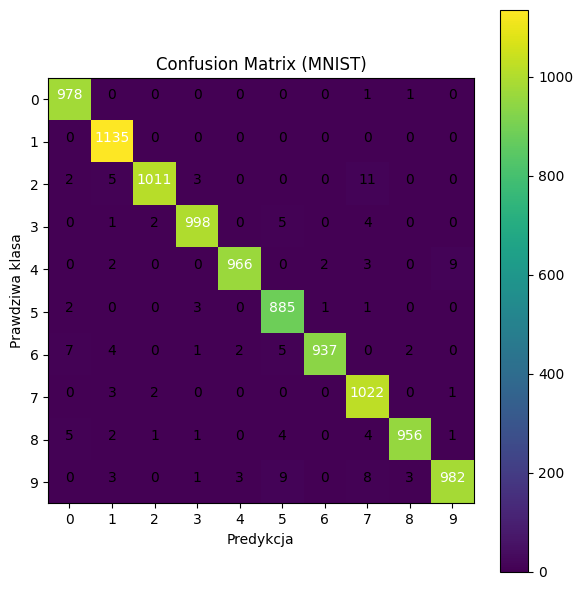

              precision    recall  f1-score   support

           0     0.9839    0.9980    0.9909       980
           1     0.9827    1.0000    0.9913      1135
           2     0.9951    0.9797    0.9873      1032
           3     0.9911    0.9881    0.9896      1010
           4     0.9949    0.9837    0.9892       982
           5     0.9747    0.9922    0.9833       892
           6     0.9968    0.9781    0.9874       958
           7     0.9696    0.9942    0.9817      1028
           8     0.9938    0.9815    0.9876       974
           9     0.9889    0.9732    0.9810      1009

    accuracy                         0.9870     10000
   macro avg     0.9871    0.9869    0.9869     10000
weighted avg     0.9871    0.9870    0.9870     10000



In [59]:
model.eval()
all_preds, all_targets = [], []
with torch.no_grad():
    for xb, yb in test_loader:
        xb = xb.to(device, non_blocking=True)
        logits = model(xb)
        preds = logits.argmax(1).cpu().numpy()
        all_preds.append(preds)
        all_targets.append(yb.numpy())

y_pred = np.concatenate(all_preds)
y_true = np.concatenate(all_targets)

test_acc = (y_pred == y_true).mean()
print(f"Test accuracy: {test_acc:.4f}")



cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6,6))
plt.imshow(cm, interpolation='nearest')
plt.title("Confusion Matrix (MNIST)")
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, tick_marks)
plt.yticks(tick_marks, tick_marks)

thresh = cm.max() / 2.0
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.ylabel('Prawdziwa klasa')
plt.xlabel('Predykcja')
plt.tight_layout()
plt.show()
print(classification_report(y_true, y_pred, digits=4))

Niestety model poradził sobie gorzej od tego niezmodyfikowanego.
Podsumowując: w oparciu o wyniki model, który najlepiej poradził sobie z dostępnymi danymi nie posiada warstwy BatchNorm oraz trzy konwolucyjne

# Podsumowanie


1.   W przypadku przetwarzania obrazów istotne jest, aby spłaszczyć dane zanim zostaną one wrzucone do modelu
2.   Ilość warstw w modelu ma znaczenie i zależy od rodzaju danych. Nie należy używać zbyt wielu warstw, ale zbyt mała ilość może okazać się niewystarczająca.
3.  Wysokość modelu zależy od przetwarzanych obrazów.
2.   Warto porównywać wnioski sprzed i po modyfikacji modelu.



